# Neural & Behavioral Modeling - Week 7 (Examples)
by Tsung-Ren (Tren) Huang (tren.huang@gmail.com)

In [2]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Representation & Coding

### 1.1 Gaussian or Cosine Tuning

A neuron's tuning to a specific feature is often simulated by a Gaussian or Cosine function. Here are some examples:

<hr>
<h4>1.1.1 V1 neurons tuned to orientations:</h4>
<img src=https://qph.fs.quoracdn.net/main-qimg-c0c113c337873d17b01b0b31fa4a3cab.webp width=50%>
<hr>

<h4>1.1.2 V1 neurons tuned to spatial frequencies:</h4>
<img src=http://slideplayer.com/3349509/12/images/10/V1+Spatial+Frequency+Tuning.jpg width=50%>
<hr>

<h4>1.1.3 Auditory neurons tuned to temporal frequencies:</h4>
<img src=http://www.cell.com/cms/attachment/2119016470/2088044474/fx1.jpg>
<hr>

<h4>1.1.4 PFC/PPC neurons tuned to numbers:</h4>
<img src=http://www.pnas.org/content/pnas/101/19/7457/F4.large.jpg width=50%>
<hr>

<h4>1.1.5 Motor neurons tuned to movement directions:</h4>
<img src=http://i.imgur.com/bEVclY9.png>
<hr>

<h4>1.1.6 A toy example:</h4>

<pre>
(z1).-.(z2).-.(z3)  <b>Percepts</b>
  |      |      |
(y1)   (y2)   (y3)  <b>V1 neuron activities</b>
  | /  \ | /  \ |
(x1)   (x2)   (x3)  <b>Stimulus features</b>
</pre>

[1.0, 0.36787944117144233, 0.01831563888873418]
[1 0 0]


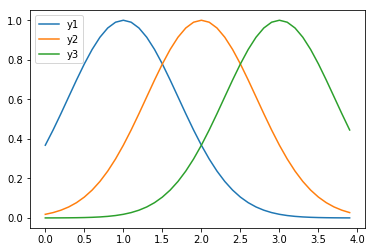

In [3]:
def g(x,c): # Simplied Gaussian response
    return exp(-(x-c)**2) # brocasting scalar c when x is a vector

# Case 1: x=[0,4]
x,y=arange(0,4,0.1),array([])
for c in range(1,4):
    y=g(x,c) # Gaussian-like responses
    plot(x,y) # tuning/response function of y
legend(['y1','y2','y3'])

# Case 2: x=1
x=1
y=[g(x,1),g(x,2),g(x,3)]
print(y)
z=(y==amax(y)).astype(int) # winner takes all
print(z)

## 2 Response Regulation

### 2.1 Phase Shift

Response normalization -> dynamic reponse range / adaptive phase shift

I= 10 , E= [ 6  7  8  9 10 11 12 13 14 15]
I= 20 , E= [12 14 16 18 20 22 24 26 28 30]
I= 30 , E= [18 21 24 27 30 33 36 39 42 45]
I= 40 , E= [24 28 32 36 40 44 48 52 56 60]


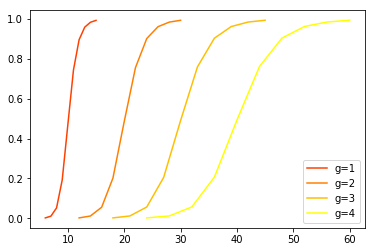

In [6]:
def sigmoid(x,a,c):
    return 1/(1+exp(a*(-(x-c))))

A,I0,E0=.1,10,arange(6,16)
for g in range(1,5): # multiplicative gains
    I,E=g*I0,g*E0 # increased BOTTOM-UP excitation & mutual inhibition
    print('I=',I,', E=',E)
    #y=E/(A+E+I) 
    y=sigmoid(E/(A+E+I),50,0.5); # try different (a,c) values
    plot(E,y,color=[1,g/4,0]) # specify [r,g,b]
    
legend(['g=1','g=2','g=3','g=4']);

### 2.2 Attention = gain control

I= 20 , E= [ 6  7  8  9 10 11 12 13 14 15]
I= 20 , E= [12 14 16 18 20 22 24 26 28 30]
I= 20 , E= [18 21 24 27 30 33 36 39 42 45]
I= 20 , E= [24 28 32 36 40 44 48 52 56 60]


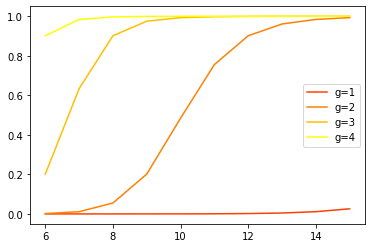

In [29]:
def sigmoid(x,a,c):
    return 1/(1+exp(a*(-(x-c))))

A,I0,E0=.1,10,arange(6,16)
for g in range(1,5): # multiplicative gains
    I,E=2*I0,g*E0 # mainly increased TOP-DOWN excitation
    print('I=',I,', E=',E)
    y=sigmoid(E/(A+E+I),50,0.5); # try different (a,c) values
    plot(E0,y,color=[1,g/4,0]) # specify [r,g,b]
legend(['g=1','g=2','g=3','g=4']);

## 3. Competitive Inhibition

It's often achieved by lateral inhibtion through interneurons.

### 3.1 A two-neuron system

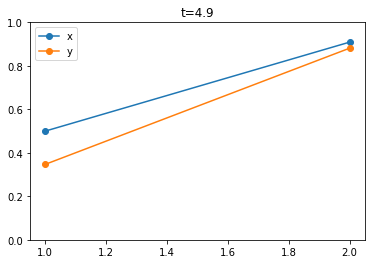

In [7]:
x=[0,0] # two neurons w/o mutual inhibitions
y=[0,0] # two neurons w/ mutual inhibitions
s=[1,10] # intensities of two stimuli 
dt=0.1 # delta t for Euler integration
for t in arange(0,5,dt):
    x[0]=x[0]+dt*(-x[0]+(1-x[0])*s[0])
    x[1]=x[1]+dt*(-x[1]+(1-x[1])*s[1])
    y[0]=y[0]+dt*(-y[0]+(1-y[0])*s[0]-y[0]*y[1])
    y[1]=y[1]+dt*(-y[1]+(1-y[1])*s[1]-y[1]*y[0])
    clf() # clear previous figure
    plot([1,2],x,'-o')
    plot([1,2],y,'-o')
    ylim([0,1]); legend(['x','y']); title('t='+str(t))
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

## 4. Recurrent Excitation

### 4.1 Linear recurrent excitations

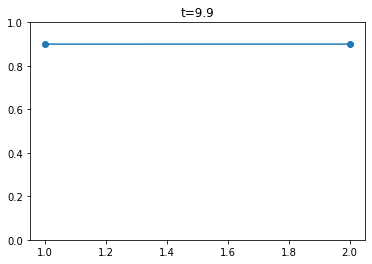

In [31]:
x=[0,0] # two neurons 
dt=0.1 # delta t for Euler integration
for t in arange(0,10,dt):
    s=[1,10] if t<1 else [0,0]
    x[0]=x[0]+dt*(-0.1*x[0]+(1-x[0])*(s[0]+x[0]))
    x[1]=x[1]+dt*(-0.1*x[1]+(1-x[1])*(s[1]+x[1]))
    clf() # clear previous figure
    plot([1,2],x,'-o')
    ylim([0,1]); title('t='+str(t))
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

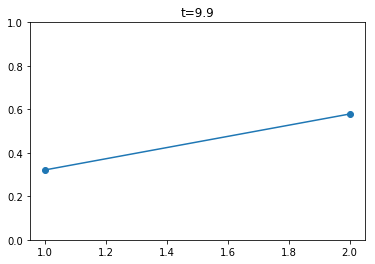

In [8]:
x=[0,0] # two neurons 
dt=0.1 # delta t for Euler integration
for t in arange(0,10,dt):
    s=[1,10] if t<1 else [0,0]
    x[0]=x[0]+dt*(-0.1*x[0]+(1-x[0])*(s[0]+x[0])-x[0]*x[1])
    x[1]=x[1]+dt*(-0.1*x[1]+(1-x[1])*(s[1]+x[1])-x[1]*x[0])
    clf() # clear previous figure
    plot([1,2],x,'-o')
    ylim([0,1]); title('t='+str(t))
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

### 4.2 Linear recurrent excitations + mutual inhbitions

### 4.3 Fast-than-linear recurrent excitations + mutual inhbitions

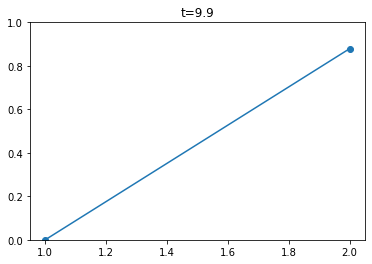

In [34]:
x=[0,0] # two neurons 
dt=0.1 # delta t for Euler integration
for t in arange(0,10,dt):
    s=[1,10] if t<1 else [0,0]
    x[0]=x[0]+dt*(-0.1*x[0]+(1-x[0])*(s[0]+x[0]**2)-x[0]*x[1])
    x[1]=x[1]+dt*(-0.1*x[1]+(1-x[1])*(s[1]+x[1]**2)-x[1]*x[0])
    clf() # clear previous figure
    plot([1,2],x,'-o')
    ylim([0,1]); title('t='+str(t))
    display(gcf()); clear_output(wait=True) # to allow dynamic plots

### 4.4 Simulation of perceptual decision-making

How do we carry out evidence accumulation to make a final decision in the random-dot paradigm?


<img src=http://mil.psy.ntu.edu.tw/fireflies.gif weight=50%>

[0.9577611621917405, 0.05194660786107281]


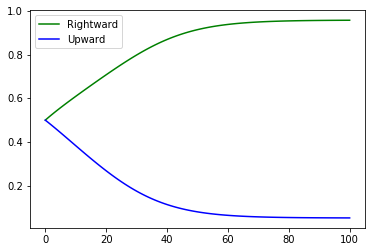

In [35]:
s=5e-2*array([10,1]) # weak stimuli
x=[0.5,0.5] # equal possibility
x0_history=[x[0]]
x1_history=[x[1]]
dt=0.1; 
for t in arange(0,10,dt):
    x[0]=x[0]+dt*(-0.01*x[0]+(1-x[0])*(s[0]+x[0]**2)-x[0]*x[1]);
    x0_history.append(x[0])
    x[1]=x[1]+dt*(-0.01*x[1]+(1-x[1])*(s[1]+x[1]**2)-x[1]*x[0]);
    x1_history.append(x[1])
plot(x0_history,'g')
plot(x1_history,'b')
legend(['Rightward','Upward']);
print(x)